In [8]:
import sys 
assert sys.version_info >= (3,5)

import sklearn
assert sklearn.__version__ >= "0.20"

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score



### Loading the dataset

In [9]:
from sklearn.datasets import load_svmlight_file

def get_data() :
	data = load_svmlight_file("/Users/josephkiragu/Desktop/fundamentals of deep learning/Assignment 1/diabetes_scale.txt")
	return data[0], data[1]

features, labels = get_data()

#### Shape of data

In [10]:
x = features.toarray()
y = labels
print(f'The shape of features = {x.shape}')
print(f'The shape of labels = {y.shape}')

The shape of features = (768, 8)
The shape of labels = (768,)


### Splitting the data into training and testing set

In [11]:
train_size = int(np.floor(x.shape[0] * 0.8))

x_train = x[:train_size]
y_train = y[:train_size]

x_test = x[train_size:]
y_test = y[train_size:]

print(f'x_train shape = {x_train.shape}, y_train shape = {y_train.shape}')
print(f'x_test shape = {x_test.shape}, y_test shape = {y_test.shape}')


x_train shape = (614, 8), y_train shape = (614,)
x_test shape = (154, 8), y_test shape = (154,)


### Perceptron function

In [12]:
def unit_step_func(x) :
    return np.where(x >= 0, 1, 0)

class Perceptron :
    def __init__(self, learning_rate = 0.1, n_iters = 1000, penalize = False) :
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.penalize = penalize

    def predict(self, x) :
        linear_output = np.dot(x, self.weights) + self.bias
        y_predicted = unit_step_func(linear_output)

        return y_predicted

    def fit(self, x, y) :
        n_samples, n_feautures = x.shape

        #initializing parameters
        self.weights = np.zeros(n_feautures) 
        self.bias = 0
        accuracy = []
        max_accuracy = 0
        
        # changing labels to 0 and 1
        y_ = np.array([1 if i > 0 else 0 for i in y])

        for i in range(self.n_iters) :
            for idx, x_i in enumerate(x) :
                #prediction of values
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = unit_step_func(linear_output)

                # Error calculcation
                update = y_[idx] - y_predicted

                # weight update rule:
                #	-1 (y_predicted is too high) -> decrease weights
                #	1 (y_predicted is too low) -> increase weights
                #	0 (correct)	-> no change
                self.weights += self.lr * update * x_i
                self.bias += self.lr * update

            # getting the accuracy score after each iteration
            accuracy.append(accuracy_score(y, self.predict(x)))
            if accuracy[i] > max_accuracy :
                max_accuracy = accuracy[i]
            
            # penalizing the learning rate by -10% after each iteration
            if self.penalize == True :
                if i % 10 == 0 :
                    self.lr *= 0.90

        print(f'Training accuracy = {max_accuracy}')
        # Plotting the learning curve
        plt.plot(accuracy)
        plt.ylim([0.3,1])
        plt.xlabel("Epochs")
        plt.ylabel("Accuracy")
        plt.show()
            
    

    


# Optimizing the perceptron 

#### Finding the best iterations

Iterations = 10
Training accuracy = 0.6123778501628665


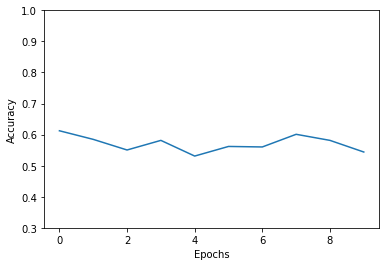

Iterations = 100
Training accuracy = 0.6351791530944625


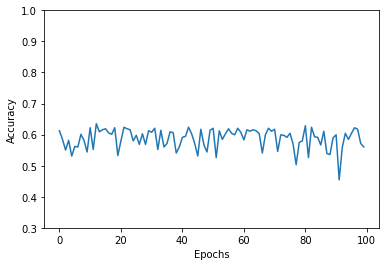

Iterations = 1000
Training accuracy = 0.6384364820846905


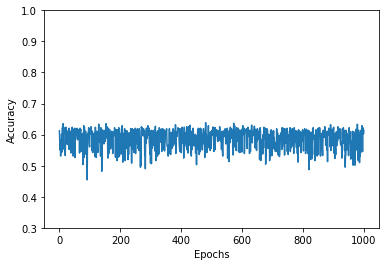

In [13]:
iterations = [10, 100, 1000]

for i in iterations :
	model = Perceptron(n_iters = i)
	print(f'Iterations = {i}')
	model.fit(x_train, y_train)
	

### Finding the best learning rate

Learning rate = 10
Training accuracy = 0.6384364820846905


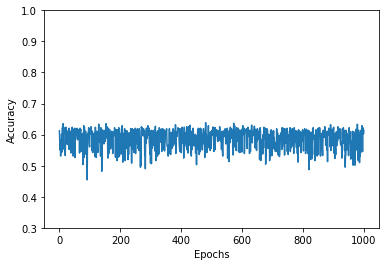

Learning rate = 1
Training accuracy = 0.6384364820846905


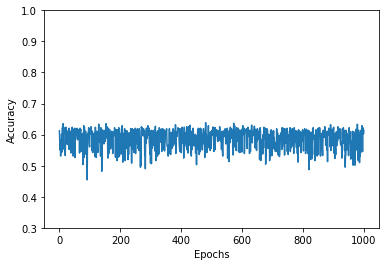

Learning rate = 0.1
Training accuracy = 0.6384364820846905


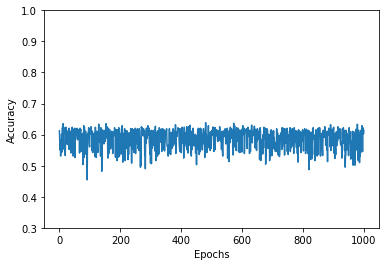

In [14]:
learning_rate = [10, 1, 0.1]

for i in learning_rate :
	model = Perceptron(learning_rate = i)
	print(f'Learning rate = {i}')
	model.fit(x_train, y_train)

## Penalizing the learning rate with -10% 

Penalize : False
Training accuracy = 0.6384364820846905


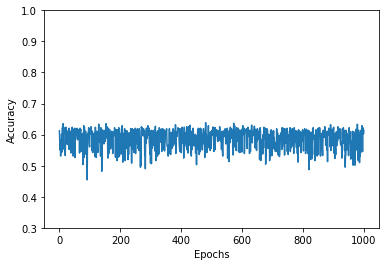

Penalize : True
Training accuracy = 0.6416938110749185


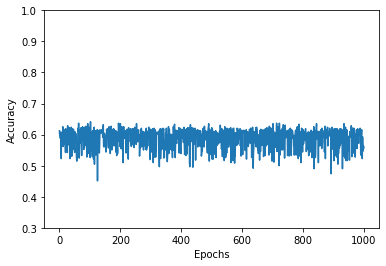

In [15]:
penalty = [ False, True]

for i in penalty :
	print(f'Penalize : {i}')
	model = Perceptron(penalize = i)
	model.fit(x_train, y_train)

## Optimized perceptron 

Training accuracy = 0.6416938110749185


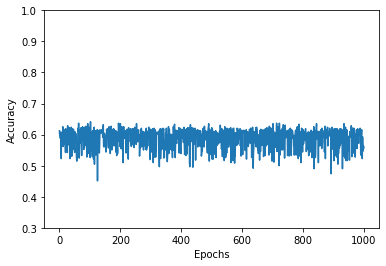

In [16]:
model = Perceptron(penalize = True, learning_rate = 0.1, n_iters = 1000)

model.fit(x_train, y_train)

### Unbiased testing score

In [17]:
y_test_conv = np.array([1 if i > 0 else 0 for i in y_test])
y_pred = model.predict(x_test)
accuracy_score(y_test_conv, y_pred)

0.7792207792207793